     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]
     Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     4
1     47    1   1            0   13.093     2
2     47    1   1            0   10.114     2
3     28    0   2            0    7.798     3
4     61    0   1            0   18.043     4
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     2
196   16    1   1   

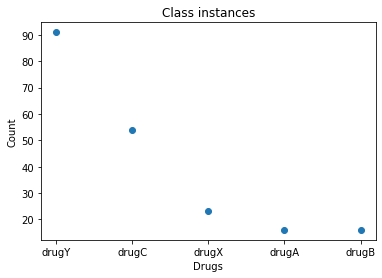

In [1]:
import pandas
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


drugs = pandas.read_csv(os.getcwd()+'/drug200.csv')

d = dict(drugs['Drug'].value_counts())

#plt.bar(drugs['Drug'].unique(),d.values())
plt.scatter(drugs['Drug'].unique(),d.values())
plt.xlabel("Drugs")
plt.ylabel("Count")
plt.title("Class instances")
plt.savefig("drugs-distribution.pdf")
print(drugs)

labelEncoder = preprocessing.LabelEncoder();
drugs["Drug"] = labelEncoder.fit_transform(drugs["Drug"])
drugs["Sex"] = labelEncoder.fit_transform(drugs["Sex"])
drugs["BP"] = labelEncoder.fit_transform(drugs["BP"])
drugs["Cholesterol"] = labelEncoder.fit_transform(drugs["Cholesterol"])

print(drugs)

y = drugs["Drug"]
del drugs["Drug"]
x = drugs
x_train, x_test, y_train, y_test = train_test_split(x,y)


if os.path.isfile('drug_performance.txt') :
    os.remove('drug_performance.txt')

In [2]:
def writeResults(y_test, y_pred, model) :
    ''' method to write our results given the y_test, y_pred and model name'''
    confusion_m = confusion_matrix(y_test, y_pred)
    precision_recall_f1_each_class = precision_recall_fscore_support(y_test, y_pred)
    f1_macro = precision_recall_fscore_support(y_test, y_pred, average="macro")[2]
    f1_weighted = precision_recall_fscore_support(y_test, y_pred, average="weighted")[2]
    accuracy = accuracy_score(y_test, y_pred)
    
    performanceFile = open("drug_performance.txt", 'a')
    classes = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
    
    drug_performance_content =  "**********************************************************\n"
    drug_performance_content += (model+"\n")
    drug_performance_content += "**********************************************************\n"
    drug_performance_content += "(b) Confusion Matrix: \n" + str(confusion_m)+"\n"
    drug_performance_content += "\n(c)\nPrecisions:\n"
    for i, p in enumerate(precision_recall_f1_each_class[0]) :
        drug_performance_content+= (classes[i]+ ": "+ str(p) +"\n")
    drug_performance_content += "\nRecalls:\n"
    for i, r in enumerate(precision_recall_f1_each_class[1]) :
        drug_performance_content+= (classes[i]+ ": "+ str(r) +"\n")
    drug_performance_content += "\nF1 Measures:\n"
    for i, f in enumerate(precision_recall_f1_each_class[2]) :
        drug_performance_content += (classes[i]+ ": "+ str(f) +"\n")
    drug_performance_content += "\n"
    drug_performance_content += ("(d) Accuracy: "+ str(accuracy) +", Macro F1: " + str(f1_macro) + ", Weighted F1: " + str(f1_weighted))
    drug_performance_content += "\n\n"
    
    performanceFile.write(drug_performance_content)
    performanceFile.close()

In [3]:
def calculateAverageResults(model) :
    '''Predicts the model 10 times then appends the averages results to the same file as previously'''
    f1_macros = []
    f1_weighteds = []
    accuracies = []
    for i in range(10):

        x_train, x_test, y_train, y_test = train_test_split(x,y)
        model.fit(x_train, y_train)
        y_pred = gauss.predict(x_test)
        f1_macros.append(precision_recall_fscore_support(y_test, y_pred, average="macro")[2])
        f1_weighteds.append(precision_recall_fscore_support(y_test, y_pred, average="weighted")[2])
        accuracies.append(accuracy_score(y_test, y_pred))
        
    mac_stdev = statistics.stdev(f1_macros)
    mic_stdev = statistics.stdev(f1_weighteds)
    acc_stdev = statistics.stdev(accuracies)
    mac_mean = statistics.mean(f1_macros)
    mic_mean = statistics.mean(f1_weighteds)
    acc_mean = statistics.mean(accuracies)
    averages = "\n"
    averages += "**********************************************************\n"
    averages += ("#8 - "+type(model).__name__+"\n")
    averages += "**********************************************************\n"
    averages += "Macro F1 Average: " + str(mac_mean) +"| Macro F1 Standard deviation: "+str(mac_stdev)+"\n"
    averages += "Weighted F1 Average: " + str(mic_mean) +"| Weighted F1 Standard deviation: "+str(mic_stdev)+"\n"
    averages += "Accuracy Average: " + str(acc_mean) +"| Accuracy F1 Standard deviation: "+str(acc_stdev)+"\n\n"

    file = open('drug_performance.txt','a')
    file.write(averages)
    file.close()

In [4]:
# 6(a)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

gauss = GaussianNB()
gauss.fit(x_train, y_train)

prediction = gauss.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)

writeResults(y_test, prediction, 'Gaussian Naive Bayes')

    prediction  test_data
0            4          4
1            2          2
2            1          0
3            4          4
4            2          4
5            1          4
6            3          3
7            3          3
8            2          2
9            1          4
10           3          3
11           4          4
12           1          1
13           4          4
14           1          0
15           0          0
16           4          4
17           2          4
18           1          0
19           4          4
20           1          1
21           3          4
22           4          4
23           4          4
24           0          0
25           4          4
26           2          4
27           3          3
28           3          3
29           3          3
30           4          4
31           2          2
32           0          0
33           1          1
34           2          4
35           4          4
36           4          4
37          

In [5]:
# 6(b)
from sklearn.tree import DecisionTreeClassifier
                
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

prediction = dtc.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)

writeResults(y_test, prediction, 'Decision Tree')

    prediction  test_data
0            4          4
1            2          2
2            0          0
3            4          4
4            4          4
5            4          4
6            3          3
7            3          3
8            2          2
9            4          4
10           3          3
11           4          4
12           1          1
13           4          4
14           0          0
15           0          0
16           4          4
17           4          4
18           1          0
19           4          4
20           1          1
21           4          4
22           4          4
23           4          4
24           0          0
25           4          4
26           4          4
27           3          3
28           3          3
29           3          3
30           4          4
31           2          2
32           0          0
33           1          1
34           4          4
35           4          4
36           4          4
37          

In [6]:
# 6(c)
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['entropy'],  
              'max_depth': [3, 4], 
              'min_samples_split': [3, 4, 5]}  
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
grid.fit(x_train, y_train) 
 
prediction = grid.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)
writeResults(y_test, prediction, "Grid Search Decision Tree\n'criterion': ['entropy']\n'max_depth': [3, 4]\n'min_samples_split': [3, 4, 5]")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
    prediction  test_data
0            4          4
1            2          2
2            0          0
3            4          4
4            4          4
5            4          4
6            3          3
7            3          3
8            2          2
9            4          4
10           3          3
11           4          4
12           1          1
13           4          4
14           0          0
15           0          0
16           4          4
17           4          4
18           1          0
19           4          4
20           1          1
21           4          4
22           4          4
23           4          4
24           0          0
25           4          4
26           4          4
27           3          3
28           3          3
29           3          3
30           4          4
31           2          2
32           0          0
33           1          1
34           4          4
35  

In [7]:
# 6(d)
from sklearn.linear_model import Perceptron

perc = Perceptron() 
perc.fit(x_train, y_train) 
 
prediction = perc.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)
writeResults(y_test, prediction, 'Perceptron')

    prediction  test_data
0            3          4
1            3          2
2            3          0
3            4          4
4            3          4
5            3          4
6            3          3
7            3          3
8            3          2
9            4          4
10           3          3
11           3          4
12           3          1
13           4          4
14           3          0
15           3          0
16           4          4
17           4          4
18           3          0
19           4          4
20           3          1
21           3          4
22           4          4
23           4          4
24           4          0
25           4          4
26           3          4
27           3          3
28           4          3
29           3          3
30           3          4
31           4          2
32           3          0
33           3          1
34           3          4
35           4          4
36           3          4
37          

C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
# 6(e)
from sklearn.neural_network import MLPClassifier

# we added max_iter due to an error occuring when default = 200
mlp = MLPClassifier(hidden_layer_sizes = (100,), activation = 'logistic', solver = 'sgd', max_iter=10000) 
mlp.fit(x_train, y_train) 
 
prediction = mlp.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)
writeResults(y_test, prediction, 'Multi-Layered Perceptron')

    prediction  test_data
0            4          4
1            3          2
2            3          0
3            4          4
4            3          4
5            1          4
6            3          3
7            3          3
8            3          2
9            4          4
10           3          3
11           4          4
12           1          1
13           4          4
14           3          0
15           3          0
16           4          4
17           4          4
18           3          0
19           4          4
20           1          1
21           3          4
22           4          4
23           4          4
24           4          0
25           4          4
26           4          4
27           3          3
28           4          3
29           3          3
30           4          4
31           4          2
32           3          0
33           3          1
34           4          4
35           4          4
36           3          4
37          

C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mtaha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# 6(f)
param_grid = {'activation': ['identity', 'logistic', 'tanh', 'relu'],  
              'hidden_layer_sizes': [(30, 50), (10, 10, 10)], 
              'solver': ['adam']}  
mlp_grid = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, refit = True, verbose = 3,n_jobs=-1) 
mlp_grid.fit(x_train, y_train) 
 
prediction = mlp_grid.predict(x_test)
predictionTable = pandas.DataFrame({'prediction':prediction,'test_data':y_test.values}, columns=["prediction","test_data"])
print(predictionTable)
writeResults(y_test, prediction, "Grid Search MLP\n'activation': ['identity', 'logistic', 'tanh', 'relu']\n'hidden_layer_sizes': [(30, 50), (10, 10, 10)]\n'solver': ['adam']")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
    prediction  test_data
0            4          4
1            2          2
2            1          0
3            4          4
4            4          4
5            1          4
6            3          3
7            3          3
8            2          2
9            4          4
10           3          3
11           4          4
12           1          1
13           4          4
14           2          0
15           1          0
16           4          4
17           4          4
18           1          0
19           4          4
20           1          1
21           3          4
22           3          4
23           4          4
24           0          0
25           4          4
26           4          4
27           3          3
28           3          3
29           3          3
30           3          4
31           2          2
32           0          0
33           1          1
34           4          4
35  

In [10]:
import statistics

calculateAverageResults(gauss)
calculateAverageResults(dtc)
calculateAverageResults(grid)
calculateAverageResults(perc)
calculateAverageResults(mlp)
calculateAverageResults(mlp_grid)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates